In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### 資料前處理/清洗/編碼

In [2]:
%load_ext cudf.pandas
import pandas as pd

df = pd.read_excel('/content/gdrive/My Drive/112年1-10月交通事故簡訊通報資料.xlsx')

#資料前處理
df_columns = ['年', '月', '日', '時', '分', '國道名稱', '方向', '里程','處理分鐘', '事故類型', '死亡', '受傷',
        '內路肩', '內車道', '中內車道','中車道', '中外車道', '外車道', '外路肩','匝道','翻覆事故\n註記',
        '施工事故\n註記','危險物品車輛\n註記', '車輛起火\n註記', '冒煙車事故\n註記','主線中斷\n註記','肇事車輛']
df = df[df_columns]

df.fillna(0, inplace=True)

translation_dict_road = {
    '國道1號': 'National Highway 1',
    '國道2號': 'National Highway 2',
    '國道3號': 'National Highway 3',
    '國道4號': 'National Highway 4',
    '國道5號': 'National Highway 5',
    '國道6號': 'National Highway 6',
    '國3甲': 'National Highway 3A',
    '國道10號': 'National Highway 10',
    '國道8號': 'National Highway 8',
    '國道3甲': 'National Highway 3A',
    '港西聯外道路': 'Port West External Road',
    '南港連絡道': 'Nangang Link Road',
    '國2甲': 'National Highway 2A'
}

translation_dict_direction = {
    '南': 'South',
    '北': 'North',
    '西': 'West',
    '南向': 'Southbound',
    '北向': 'Northbound',
    '西向': 'Westbound',
    '東向': 'Eastbound',
    '東': 'East',
    '南北': 'South-North',
    '雙向': 'Two-way'
}

df['國道名稱'] = df['國道名稱'].map(translation_dict_road)
df['方向'] = df['方向'].map(translation_dict_direction)

df = df.dropna()

feature_columns = ['年','月','日','時','分','國道名稱','方向','里程','處理分鐘','事故類型','死亡','受傷',
           '內路肩','內車道','中內車道','中車道','中外車道','外車道','外路肩','匝道','翻覆事故註記',
          '施工事故註記','危險物品車輛註記','車輛起火註記','冒煙車事故註記','主線中斷註記','肇事車輛']
df.columns = feature_columns

#進行編碼
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

df = df.astype(str)
#進行Label Encoding
le_road = LabelEncoder()
df['國道名稱'] = le_road.fit_transform(df['國道名稱'])

#進行One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
encoded_features = encoder.fit_transform(df[['方向', '事故類型']])

#編碼後的特徵欄位
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['方向', '事故類型']))

# 刪除編碼完成的欄位並與編碼後的特徵合併
df = df.drop(['方向', '事故類型'], axis=1)
df = pd.concat([df, encoded_df], axis=1)

#修正部分數值
df['翻覆事故註記'] = df['翻覆事故註記'].replace(' ', '0')
df = df.dropna()
df

,年,月,日,時,分,國道名稱,里程,處理分鐘,死亡,受傷,...,方向_South,方向_South-North,方向_Southbound,方向_Two-way,方向_West,方向_Westbound,事故類型_0,事故類型_A1,事故類型_A2,事故類型_A3
0,2023,2,9,19,21,5,54.0,41,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2023,2,10,3,36,1,6.0,75,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2023,2,10,5,33,5,76.0,20,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2023,2,10,7,35,5,98.0,9,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2023,2,10,7,52,1,23.0,16,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26731,2023,8,8,7,30,1,43.4,20,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26732,2023,8,8,7,50,3,4.0,12,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26733,2023,8,8,8,12,1,21.0,9,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26734,2023,8,8,9,35,1,23.0,13,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


# 準備數據集
X = df.drop(columns=['處理分鐘','年','日'])  # 特徵
y = df['處理分鐘']  # 目標變量

# 分割數據
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestRegressor
rf_regressor = RandomForestRegressor()

# 訓練模型
rf_regressor.fit(X_train, y_train)

# 模型預測與評估
y_pred_rf = rf_regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("RandomForest Regressor Mean Squared Error:", mse_rf)


# Voting Regressor
# 準備多個基模型
gb_regressor = GradientBoostingRegressor()
svr_regressor = SVR()

# 初始化投票回歸器
voting_regressor = VotingRegressor(estimators=[
    ('rf', rf_regressor),         # 使用已經訓練好的隨機森林模型
    ('gb', gb_regressor),
    ('svr', svr_regressor)
])

# 訓練投票回歸器
voting_regressor.fit(X_train, y_train)

# 模型預測與評估
y_pred_voting = voting_regressor.predict(X_test)
mse_voting = mean_squared_error(y_test, y_pred_voting)
print("Voting Regressor Mean Squared Error:", mse_voting)


# Stacking Regressor
# 使用多個基模型，並使用線性回歸作為元學習器
stacking_regressor = StackingRegressor(
    estimators=[
        ('rf', rf_regressor),
        ('gb', gb_regressor),
        ('svr', svr_regressor)
    ],
    final_estimator=LinearRegression()
)

# 訓練Stacking回歸器
stacking_regressor.fit(X_train, y_train)

# 模型預測與評估
y_pred_stacking = stacking_regressor.predict(X_test)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
print("Stacking Regressor Mean Squared Error:", mse_stacking)

RandomForest Regressor Mean Squared Error: 184.1894968042004
Voting Regressor Mean Squared Error: 216.83026607613095
Stacking Regressor Mean Squared Error: 189.40469137452695


### 將預測值與實際值合併成DataFrame後繪圖

In [4]:
#定義函式用於生成比對結果
def generate_result(y_pred,y_test):
  #將 y_pred 和 y_test 合併到一個 DataFrame
  y_pred = pd.Series(y_pred, index=y_test.index, name='Predict')
  Result = pd.concat([y_test, y_pred], axis=1).reset_index(drop=True)

  #生成新欄位['Error']用於繪製誤差值的趨勢線，誤差 = 預測值 - 實際值
  Result['處理分鐘'] = Result['處理分鐘'].astype(float)
  Result['Predict'] = Result['Predict'].astype(float)
  Result['Error'] = Result['Predict'] - Result['處理分鐘']
  return Result

In [5]:
Result_rf = generate_result(y_pred_rf, y_test)
Result_voting = generate_result(y_pred_voting, y_test)
Result_stacking = generate_result(y_pred_stacking, y_test)

### 繪圖

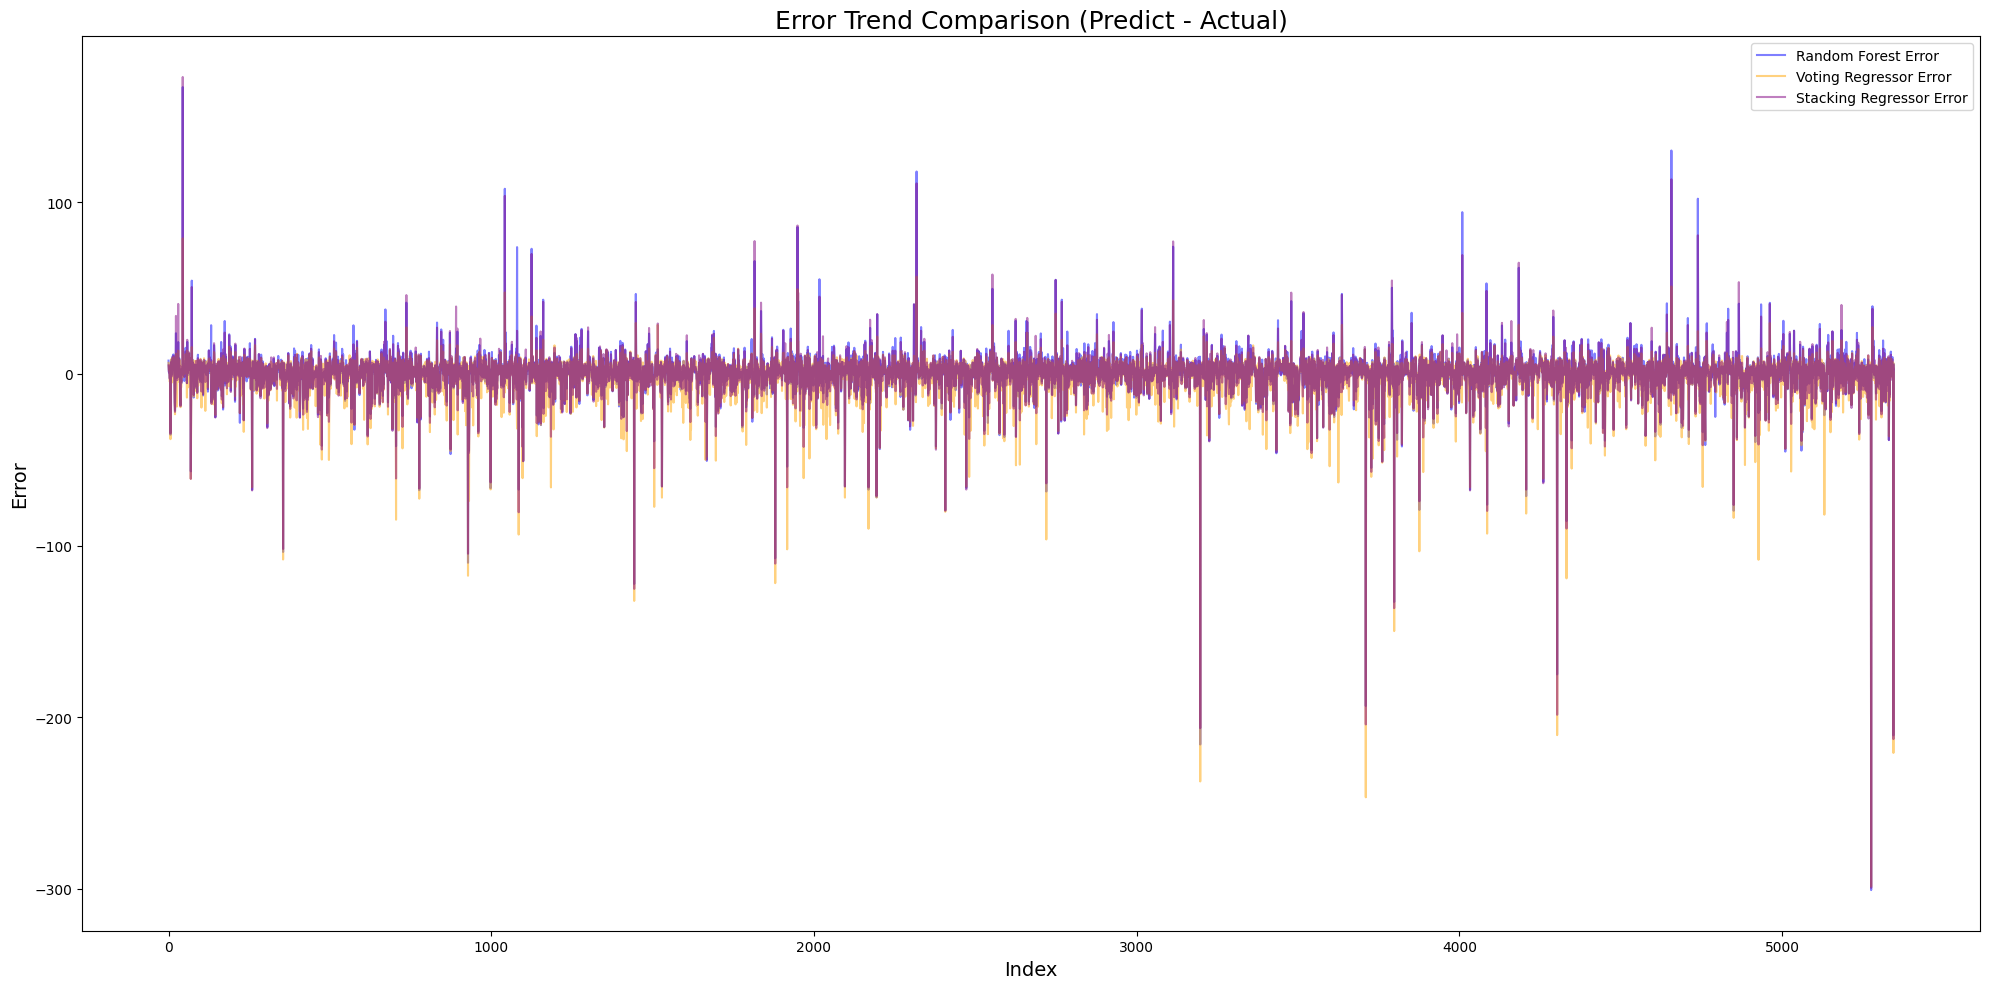

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


# 繪製三個模型的誤差趨勢線在同一張圖上
plt.figure(figsize=(20, 10))

# RandomForestRegressor 的誤差趨勢線
sns.lineplot(data=Result_rf, x=Result_rf.index, y="Error", label="Random Forest Error", color='blue', alpha=0.5)

# Voting Regressor 的誤差趨勢線
sns.lineplot(data=Result_voting, x=Result_voting.index, y="Error", label="Voting Regressor Error", color='orange', alpha=0.5)

# Stacking Regressor 的誤差趨勢線
sns.lineplot(data=Result_stacking, x=Result_stacking.index, y="Error", label="Stacking Regressor Error", color='purple', alpha=0.5)

# 設置標題與標籤
plt.title("Error Trend Comparison (Predict - Actual)", fontsize=18)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Error", fontsize=14)

# 顯示圖例
plt.legend()

# 調整布局
plt.tight_layout()

# 顯示圖表
plt.show()


### 載入測試集/資料預處理/編碼

In [7]:
test_df = pd.read_excel('/content/gdrive/My Drive/113年1-2月交通事故簡訊通報資料.xlsx')

#預處理
test_df = test_df[feature_columns]
test_df.fillna(0, inplace=True)
test_df['國道名稱'] = test_df['國道名稱'].map(translation_dict_road)
test_df['方向'] = test_df['方向'].map(translation_dict_direction)
test_df = test_df.dropna()

#編碼
test_df = test_df.astype(str)

#進行Label Encoding
test_df['國道名稱'] = le_road.transform(test_df['國道名稱'])

#進行One-Hot Encoding
test_encoded_features = encoder.transform(test_df[['方向', '事故類型']])

#編碼後的特徵欄位
test_encoded_df = pd.DataFrame(test_encoded_features, columns=encoder.get_feature_names_out(['方向', '事故類型']))

# 刪除編碼完成的欄位
test_df = test_df.drop(['方向', '事故類型'], axis=1)

#重設索引後進行合併
test_df.reset_index(drop=True, inplace=True)
test_encoded_df.reset_index(drop=True, inplace=True)
test_df = pd.concat([test_df, test_encoded_df], axis=1)
test_df

,年,月,日,時,分,國道名稱,里程,處理分鐘,死亡,受傷,...,方向_South,方向_South-North,方向_Southbound,方向_Two-way,方向_West,方向_Westbound,事故類型_0,事故類型_A1,事故類型_A2,事故類型_A3
0,2024,1,14,15,31,6,5.6,14,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2024,1,1,19,50,6,5.1,3,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2024,1,30,22,7,6,5.3,16,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2024,1,26,2,19,6,3.0,30,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2024,1,9,8,44,6,2.6,29,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,2024,2,2,17,26,1,196.3,17,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1109,2024,2,2,17,0,1,230.5,18,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1110,2024,2,11,17,34,1,141.1,9,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1111,2024,2,11,17,35,5,211.3,14,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [8]:
#將新的資料集作為驗證集
Validation_X = test_df.drop(columns=['處理分鐘','年','日'])  # 特徵
Validation_y = test_df['處理分鐘']  # 目標變量

#RandomForestRegressor
validation_y_pred_rf = rf_regressor.predict(Validation_X)
mse_rf  = mean_squared_error(Validation_y, validation_y_pred_rf)
print("RandomForest Regressor Mean Squared Error:", mse_rf)

#Voting
validation_y_pred_voting = voting_regressor.predict(Validation_X)
mse_voting  = mean_squared_error(Validation_y, validation_y_pred_voting)
print("Voting Regressor Mean Squared Error:", mse_voting)

#Stacking
validation_y_pred_stacking = stacking_regressor.predict(Validation_X)
mse_stacking = mean_squared_error(Validation_y, validation_y_pred_stacking)
print("Stacking Regressor Mean Squared Error:", mse_stacking)

RandomForest Regressor Mean Squared Error: 428.6001081761006
Voting Regressor Mean Squared Error: 343.54178677756136
Stacking Regressor Mean Squared Error: 408.62658101228084


### 合併成DataFrame後繪圖

In [9]:
Result_validation_rf = generate_result(validation_y_pred_rf, Validation_y)
Result_validation_voting = generate_result(validation_y_pred_voting, Validation_y)
Result_validation_stacking = generate_result(validation_y_pred_stacking, Validation_y)

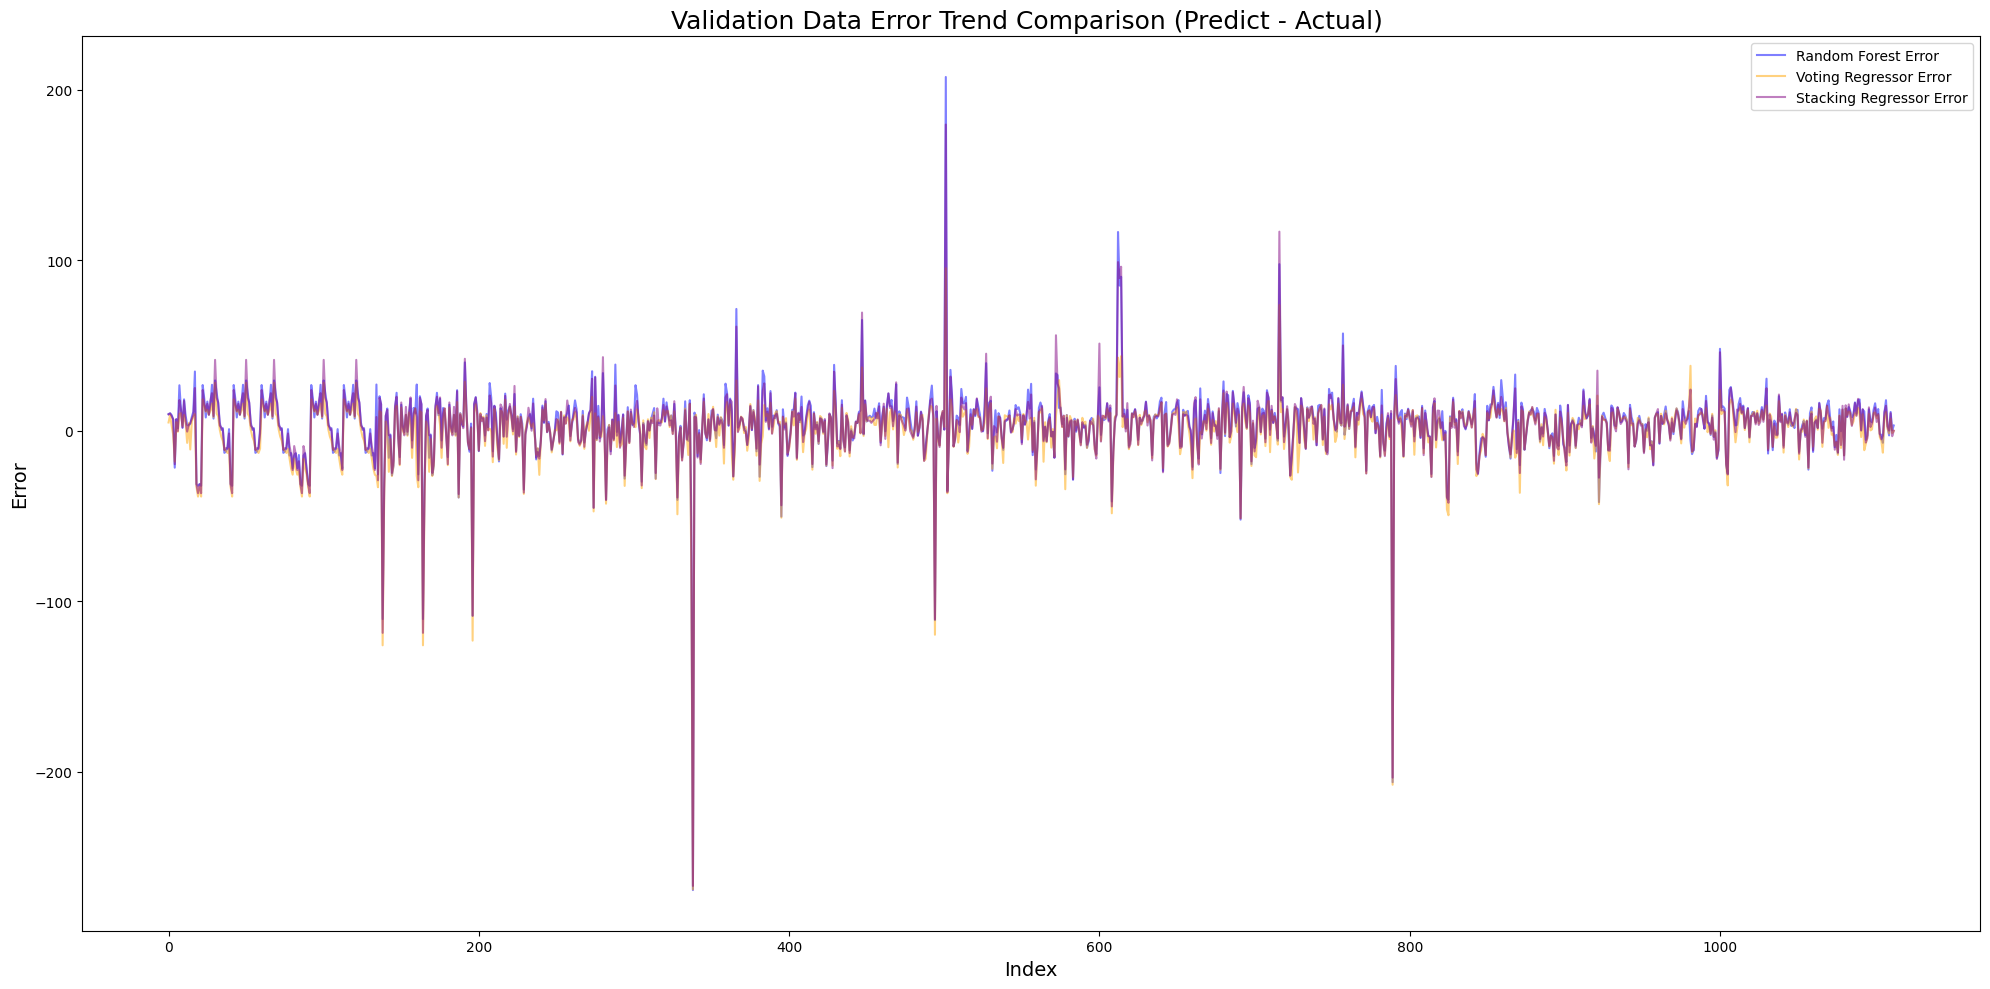

In [10]:
# 繪製三個模型的誤差趨勢線在同一張圖上
plt.figure(figsize=(20, 10))

# RandomForestRegressor 的誤差趨勢線
sns.lineplot(data=Result_validation_rf, x=Result_validation_rf.index, y="Error", label="Random Forest Error", color='blue', alpha=0.5)

# Voting Regressor 的誤差趨勢線
sns.lineplot(data=Result_validation_voting, x=Result_validation_voting.index, y="Error", label="Voting Regressor Error", color='orange', alpha=0.5)

# Stacking Regressor 的誤差趨勢線
sns.lineplot(data=Result_validation_stacking, x=Result_validation_stacking.index, y="Error", label="Stacking Regressor Error", color='purple', alpha=0.5)

# 設置標題與標籤
plt.title("Validation Data Error Trend Comparison (Predict - Actual) ", fontsize=18)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Error", fontsize=14)

# 顯示圖例
plt.legend()

# 調整布局
plt.tight_layout()

# 顯示圖表
plt.show()


### Voting 有效減少模型訓練發生的過擬合